# Etapa 1 - Manipular dados

In [ ]:
import pandas as pd

# importando o dataset sklearn
from sklearn.datasets import load_iris

# retornando os dados
iris = load_iris()
iris


In [ ]:
# transformar em dataframe
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_df['target'] = iris.target
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


# Etapa 2 - Calcular a distância

In [7]:
#selecionar apenas colunas de pétalas
iris1 = iris_df.loc[iris_df.target.isin([1,2]),['petal length (cm)', 'petal width (cm)', 'target']]
iris1

,petal length (cm),petal width (cm),target
50,4.7,1.4,1
51,4.5,1.5,1
52,4.9,1.5,1
53,4.0,1.3,1
54,4.6,1.5,1
...,...,...,...
145,5.2,2.3,2
146,5.0,1.9,2
147,5.2,2.0,2
148,5.4,2.3,2


In [10]:
#separando x e y
x = iris1[['petal length (cm)', 'petal width (cm)']]
y = iris1.target


In [11]:
#fazendo o train_test_split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size = 0.33, random_state = 42)

<function matplotlib.pyplot.show(close=None, block=None)>

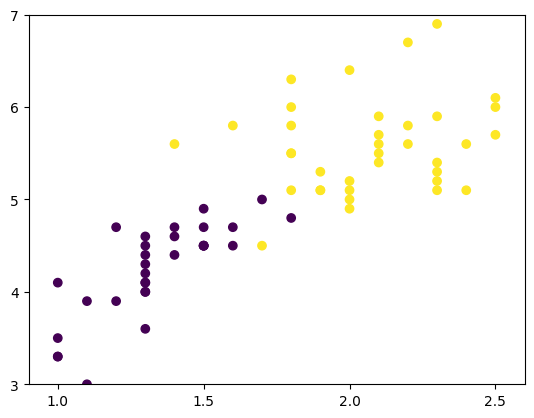

In [22]:
# visualização dos dados de treino
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.scatter(x = x_train['petal width (cm)'],
           y=x_train['petal length (cm)'],
           c=y_train,
           cmap='viridis')
ax.set(xlim=(0.9, 2.6), xticks=[1,1.5,2,2.5], ylim=(3, 7),
       yticks=[3,4,5,6,7])
plt.show

# Etapa 3 - Treinando os dados

In [26]:
x = [[0], [1], [2], [3]]
y = [0,0,1,1]
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(x,y)
KNeighborsClassifier(...)
print(neigh.predict([[1.1]]))
print(neigh.predict_proba([[0.9]]))

[0]
[[0.66666667 0.33333333]]


In [28]:
# importando o k-NN
from sklearn.neighbors import KNeighborsClassifier


In [29]:
# criando o classificador
clf = KNeighborsClassifier(n_neighbors=3)
clf = clf.fit(x_train, y_train)

In [30]:
# fazendo a previsão para os dados de teste
y_pred = clf.predict(x_test)

In [31]:
# verificando a matriz de confusão
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[19,  0],
       [ 6,  8]])

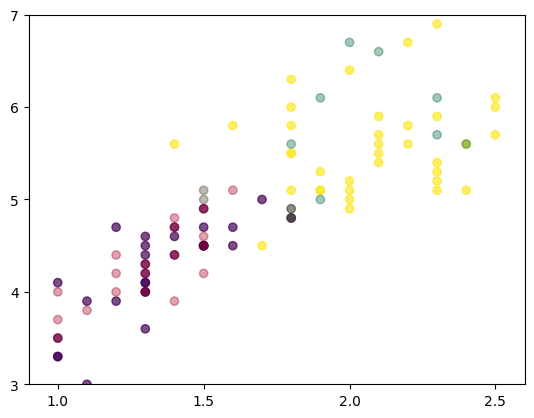

In [36]:
# visualizar os dados de treino e teste
fig, ax = plt.subplots()

ax.scatter(x=x_train['petal width (cm)'],
           y=x_train['petal length (cm)'],
           c=y_train, alpha=0.7,
           cmap='viridis')

ax.scatter(x=x_test['petal width (cm)'],
           y=x_test['petal length (cm)'],
           c=y_pred, alpha=0.2,
           cmap='RdYlGn')

ax.scatter(x=x_test['petal width (cm)'],
           y=x_test['petal length (cm)'],
           c=y_test, alpha=0.2,
           cmap='RdYlGn')

ax.set(xlim=(0.9, 2.6), xticks=[1,1.5,2,2.5],
       ylim=(3, 7), yticks=[3,4,5,6,7])

plt.show()



# Etapa 4 - Precisão

In [38]:
# imprime os valores previstos errado
x_test[y_test != y_pred]

,petal length (cm),petal width (cm)
133,5.1,1.5
123,4.9,1.8
126,4.8,1.8
127,4.9,1.8
138,4.8,1.8
119,5.0,1.5
